In [1]:
import datetime
import os
import json
from os import listdir
from os.path import isfile, join
from time import sleep

folder = os.path.join('C:/', 'users', 'charr', 'OneDrive', 'Desktop', 'Spring Quarter', 'Social Network Analysis', 'Congress COVID', 'COVID data')

get_files = [f for f in listdir(folder) if isfile(join(folder, f))]

def open_file(file_name):
    with open(file_name, mode = 'r', encoding = 'utf8') as reader:
        dct = json.load(reader)
    return dct

In [2]:
from collections import Counter
hashtag_dct = Counter()
url_dct = Counter()

for file in get_files:
    dct = open_file(f'./COVID data/{file}')
    for k, v in dct.items():
        for k1,v1 in v['entities'].items():
            if v1 != []:
                if 'hashtags' in k1:
                    for i in range(len(v1)):
                        hashtag_dct[(v1[i]['text']).lower()] +=1
                if 'urls' in k1:
                    for i in range(len(v1)):
                        url_dct[v1[i]['expanded_url']] +=1

In [3]:
#url_dct.most_common()

In [4]:
#hashtag_dct.most_common() 

In [5]:
hashtag_list = [(i[0]).lower() for i in hashtag_dct.most_common()]
hashtag_list = sorted(hashtag_list, key = lambda x: x, reverse = False)

url_list = [i[0] for i in url_dct.most_common()]
url_list = sorted(url_list, key = lambda x: x, reverse = False)

In [6]:
import re

search_string = 'covid|corona|flattenthecurve|ppe|socialdistancing|stayathome|stopthespread|staysafe|\
who|quarantine|wuhan|flu|caresact|paycheckprotectionprogram|ppp|smallbiz|smallbusinesses|votebymail|healthcare|\
ppploan|paymentprotectionprogram'

hashtag_lst = []
url_lst = []

for i in hashtag_list:
    if re.search(fr'{search_string}', i):
        hashtag_lst.append(i)

for i in url_list:
    if re.search(fr'{search_string}', i):
        url_lst.append(i)

#hashtag_lst
#url_lst

In [41]:
from collections import Counter, defaultdict
from pprint import pprint

retweet_list = []
for file in get_files:
    dct = open_file(f'./COVID data/{file}')
    for key, value in dct.items():
        if 'retweeted_status' in value.keys():
            retweet_list.append((value['retweeted_status']['user']['name'],value['user']['name']))
            #getting a list of (user who originally tweeted, user who re-tweeted)
        

retweeted_dict = defaultdict(lambda: list)
for i in retweet_list:
    if i[0] in retweeted_dict:
        retweeted_dict[i[0]].append(i[1])
    else:
        retweeted_dict[i[0]] = [i[1]]
            
retweet_dict = {}
for key, value in retweeted_dict.items():
    temp_dct = Counter()
    for i in value:
        temp_dct[i] +=1
    retweet_dict[key] = dict(temp_dct)
    
#pprint(retweet_dict)

In [8]:
#covid specific tweets
from collections import Counter, defaultdict
from pprint import pprint


#getting a list of (user who originally tweeted, user who re-tweeted, and the )
retweet_list = []
for file in get_files:
    dct = open_file(f'./COVID data/{file}')
    for key, value in dct.items():
        if 'retweeted_status' in value.keys():
            for k1,v1 in value['entities'].items():
                if v1 != []:
                    if 'hashtags' in k1:
                        for i in range(len(v1)):
                            if (v1[i]['text']).lower() in hashtag_lst:
                                retweet_list.append((value['retweeted_status']['user']['name'],value['user']['name'],value['retweeted_status']['id'],))
                    if 'urls' in k1:
                        for i in range(len(v1)):
                            if (v1[i]['expanded_url']).lower() in url_lst:
                                retweet_list.append((value['retweeted_status']['user']['name'],value['user']['name'],value['retweeted_status']['id']))
                               
        

retweeted_dict = defaultdict(lambda: list)
for i in retweet_list:
    if i[0] in retweeted_dict:
        retweeted_dict[i[0]].append(i[1])
    else:
        retweeted_dict[i[0]] = [i[1]]
            
retweet_dict = {}
for key, value in retweeted_dict.items():
    temp_dct = Counter()
    for i in value:
        temp_dct[i] +=1
    retweet_dict[key] = dict(temp_dct)
    
pprint(retweet_dict)

on General': {'Anthony Gonzalez': 1,
                          'Bill Johnson': 1,
                          'Congressman Dan Meuser': 1,
                          'Congressman Michael Guest': 1,
                          'Congressman Troy Balderson': 3,
                          'Congresswoman Debbie Lesko': 1,
                          'Darin LaHood': 1,
                          'Debbie Lesko': 1,
                          'House Homeland GOP': 1,
                          'House Republicans': 3,
                          "House Veterans' Affairs GOP": 2,
                          'Joe Wilson': 1,
                          'Judge Carter': 1,
                          'Ken Calvert': 1,
                          'Kevin McCarthy': 1,
                          'Martha McSally': 1,
                          'Rep. Alex Mooney': 3,
                          'Rep. Don Bacon': 1,
                          'Rep. Doug Lamborn': 2,
                          'Rep. Elise Stefanik': 1,
            

In [47]:
user_list = open_file('Republicans.json')

retweet_edges = []
for key, value in retweet_dict.items():
    if (key in user_list):
        for key2, value2 in value.items():
            if key2 in user_list:
                retweet_edges.append((key, key2, value2))

In [48]:
retweet_edges

esko', 'Steve Scalise', 1),
 ('Congresswoman Debbie Lesko', 'Rep. Chip Roy', 1),
 ('Congresswoman Debbie Lesko', 'Rep. Guy Reschenthaler', 1),
 ('Congresswoman Debbie Lesko', 'Rep. Jim Jordan', 1),
 ('Congresswoman Debbie Lesko', 'Virginia Foxx', 1),
 ('Rep. Mike Johnson', 'Rep. Mike Johnson', 22),
 ('Rep. Mike Johnson', 'Mark Meadows', 10),
 ('Rep. Mike Johnson', 'Scott DesJarlais', 1),
 ('Rep. Mike Johnson', 'Kevin McCarthy', 4),
 ('Rep. Mike Johnson', 'U.S. Representative Bill Flores', 1),
 ('Rep. Mike Johnson', 'Lee Zeldin', 1),
 ('Rep. Mike Johnson', 'Congresswoman Debbie Lesko', 3),
 ('Rep. Mike Johnson', 'Tom Reed', 1),
 ('Rep. Mike Johnson', 'Steve Scalise', 4),
 ('Rep. Mike Johnson', 'Rep. Paul Gosar, DDS', 1),
 ('Rep. Mike Johnson', 'Jim Banks', 2),
 ('Rep. Mike Johnson', 'Paul Gosar', 1),
 ('Rep. Mike Johnson', 'Kevin Brady for Congress', 1),
 ('Rep. Mike Johnson', 'Rep. Guy Reschenthaler', 1),
 ('Steve Scalise', 'Kevin McCarthy', 10),
 ('Steve Scalise', 'Trent Kelly', 1),
 

In [23]:
from networkx.algorithms.link_analysis import pagerank_alg

nx.out_degree_centrality?

Signature: nx.out_degree_centrality(G)
Docstring:
Compute the out-degree centrality for nodes.

The out-degree centrality for a node v is the fraction of nodes its
outgoing edges are connected to.

Parameters
----------
G : graph
    A NetworkX graph

Returns
-------
nodes : dictionary
    Dictionary of nodes with out-degree centrality as values.

Raises
------
NetworkXNotImplemented:
    If G is undirected.

See Also
--------
degree_centrality, in_degree_centrality

Notes
-----
The degree centrality values are normalized by dividing by the maximum
possible degree in a simple graph n-1 where n is the number of nodes in G.

For multigraphs or graphs with self loops the maximum degree might
be higher than n-1 and values of degree centrality greater than 1
are possible.
File:      c:\users\charr\anaconda3\lib\site-packages\networkx\algorithms\centrality\degree_alg.py
Type:      function


standardized degree centrality

$$  C'_D(u_i) = \frac{d(u_i)}{n-1 }$$

standardized closeness centrality
$$  C'_C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$$



standardized betweenness centrality

$$ C'_B(u) =\frac{\sum_{s,t \in V} \frac{\sigma(s, t|u)}{\sigma(s, t)}}{((n-1)(n-2))} $$

In [18]:
import networkx as nx
from matplotlib import pyplot as plt

def centrality_measures(Network, count):
    degree_centrality = sorted([(v, (c / (len(nx.nodes(Network)) - 1))) for v, c in dict(nx.degree(Network)).items()], key = lambda x: x[1], reverse = True)
    out_degree_centrality = sorted([(v, c) for v, c in dict(nx.out_degree_centrality(Network)).items()], key = lambda x: x[1], reverse = True)
    #in_degree_centrality = sorted([(v, (c / (len(nx.nodes(Network)) - 1))) for v, c in dict(nx.in_degree_centrality(Network)).items()], key = lambda x: x[1], reverse = True)
    
    #closeness Centrality - WF set to true - scale by the fraction of nodes reachable in the network
    closeness_centrality = sorted([(v, c) for v, c in dict(nx.closeness_centrality(Network, wf_improved = True)).items()], key = lambda x: x[1], reverse = True)
    #betweeness centrality -edge weight set to true, endpoints set to true, normalized = true 
    betweeness_centrality = sorted([(v, c) for v, c in dict(nx.betweenness_centrality(Network, weight = True, normalized = True, endpoints = True)).items()], key = lambda x: x[1], reverse = True)
    
    #eigenvector centrality - weight set to true, try except due to max_iter value 
    #try:
    #    eigenvector_centrality = sorted([(v, c) for v, c in dict(nx.eigenvector_centrality(Network,max_iter = 0, weight = True)).items()], key = lambda x: x[1], reverse = True)
    #except:
    #    eigenvector_centrality = sorted([(v, c) for v, c in dict(nx.eigenvector_centrality(Network, weight = True)).items()], key = lambda x: x[1], reverse = True)
    #katz_centrality = sorted([(v, c) for v, c in dict(nx.katz_centrality(Network, normalized = False), weight = True).items()], key = lambda x: x[1], reverse = True)
    pagerank_centrality = sorted([(v, c) for v, c in dict(nx.pagerank(Network)).items()], key = lambda x: x[1], reverse = True)
    
    centrality_list = [out_degree_centrality,closeness_centrality,betweeness_centrality,  pagerank_centrality]
    centrality_name_list = ['Out-Degree Centrality','Closeness Centrality','Betweeness Centrality', 'PageRank Centrality']
    for c,n in zip(centrality_list, centrality_name_list):
        print(n)
        for i in range(count):
            print(f'{i+1}. {c[i][0]}: {c[i][1]: 0.3f}')
        print('\n')



    

In [19]:
from networkx.algorithms import centrality
from networkx.algorithms.centrality import closeness


In [49]:
G = nx.DiGraph()
G.add_nodes_from(user_list)
G.add_weighted_edges_from(retweet_edges)

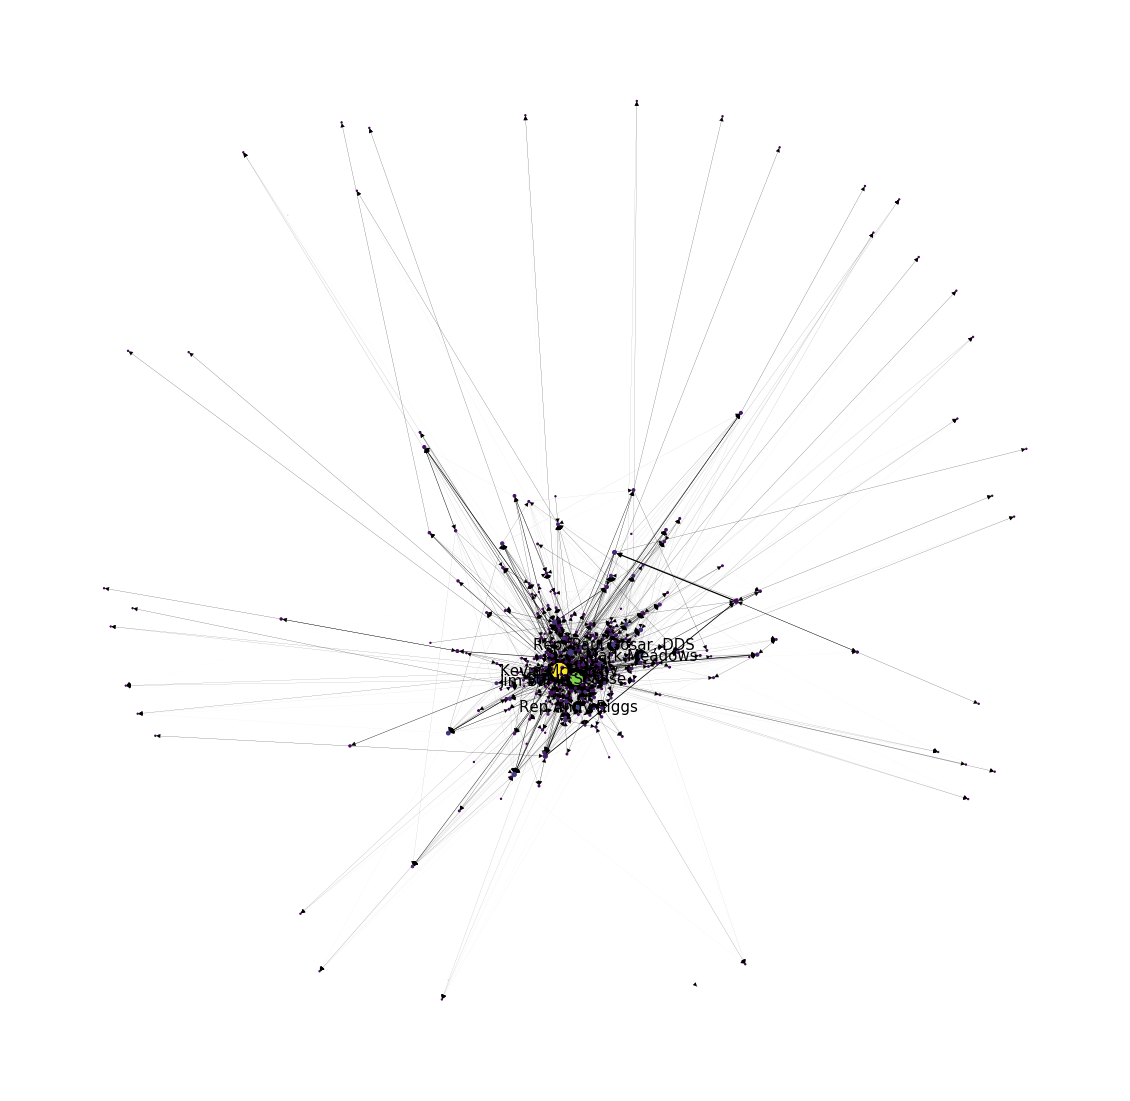

In [55]:
label_dct = {key: key for key, value in dict(G.degree()).items() if value >45}
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 1000 for v in betCent.values()]
width =  [w * 100 for w in nx.edge_betweenness_centrality(G).values()]
f = plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=True, labels = label_dct,
                 node_color=node_color,
                 node_size=node_size, font_size = 15, width = width )
plt.axis('off')
f.savefig("Republican_all.png")
#centrality_measures(G,5)

In [13]:
##Not really sure about this, we didn't cover it much in class but whatever
from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

next_level_communities_sorted = sorted(map(sorted, next_level_communities), key = lambda x: len(x), reverse = True)

Degree Centrality
1. Congresswoman Ayanna Pressley:  44.000
2. Nancy Pelosi:  36.000
3. Jan Schakowsky:  35.000


Out-Degree Centrality
1. Congresswoman Ayanna Pressley:  0.169
2. Ami Bera, M.D.:  0.124
3. Nancy Pelosi:  0.112


Closeness Centrality
1. Dwight Evans:  0.182
2. Rep. Jamie Raskin:  0.181
3. Congressman Chuy García:  0.174


Betweeness Centrality
1. Jan Schakowsky:  19678.160
2. Congressman Chuy García:  13921.690
3. Dwight Evans:  9715.506


Eigenvector Centrality
1. Congressman Chuy García:  0.372
2. Rep. Jamie Raskin:  0.318
3. Dwight Evans:  0.281


Katz Centrality
1. Rep. Jamie Raskin:  5.009
2. Congressman Chuy García:  4.595
3. Rep. Don Beyer:  4.198




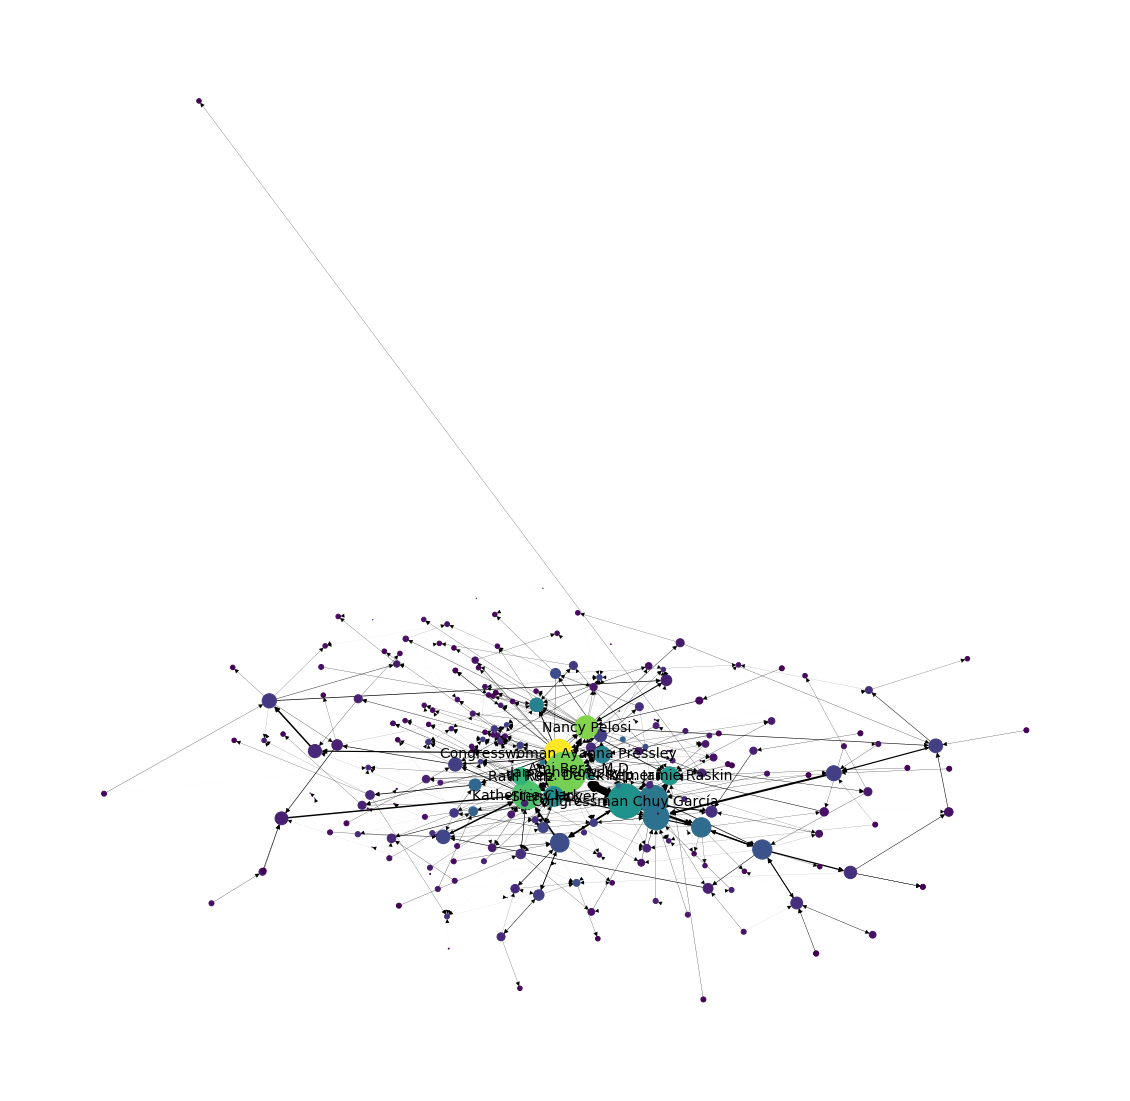

In [14]:
next_level_edges = [i for i in retweet_edges if i[0] in next_level_communities_sorted[0]]

G_next_level_communities = nx.DiGraph()
G_next_level_communities.add_nodes_from(next_level_communities_sorted[0])
G_next_level_communities.add_weighted_edges_from(next_level_edges)


label_dct = {key: key for key, value in dict(G_next_level_communities.degree()).items() if value > 20}
pos = nx.kamada_kawai_layout(G_next_level_communities)
betCent = nx.betweenness_centrality(G_next_level_communities, normalized=True, endpoints=True)
node_color = [6000.0 * G_next_level_communities.degree(v) for v in G_next_level_communities]
node_size =  [v * 10000 for v in betCent.values()]
width =  [w * 100 for w in nx.edge_betweenness_centrality(G_next_level_communities).values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_next_level_communities, pos=pos, with_labels=True, labels = label_dct,
                 node_color=node_color,
                 node_size=node_size, font_size = 14, width = width)
plt.axis('off')

centrality_measures(G_next_level_communities,3)